In [1]:
using Revise
using ConvexHullPricing
using DataFrames
using Plots
using JLD2
using Plots.PlotMeasures
using ProgressBars, JuMP, Gurobi
const UT = ConvexHullPricing.Utilitaries
const OPT = ConvexHullPricing.Optimizer
function mon(array)
    result = Float64[]
    last = array[1]
    for elt in array
      new_last = minimum([elt, last])
      push!(result, new_last)
      last = new_last
    end
    return result
end

Set parameter Username
Academic license - for non-commercial use only - expires 2025-03-01
Set parameter Username
Academic license - for non-commercial use only - expires 2025-03-01


mon (generic function with 1 method)

In [2]:
ThermalGen = ConvexHullPricing.Utilitaries.ThermalGen(
    MinRunCapacity = [0, 6],
    MaxRunCapacity = [15, 10],
    RampUp = [100, 100],
    RampDown = [100, 100],
    StartUp = [100, 100],
    ShutDown = [100, 100],
    UpTime = [1, 1],
    DownTime = [1, 1],
    NoLoadConsumption = [0, 0],
    MarginalCost = [10, 40],
    FixedCost = [0, 0],
)
instance = ConvexHullPricing.Utilitaries.Instance(
    LostLoad = 60,
    Load = [20],
    ThermalGen = ThermalGen
)
X0 = [1.]

1-element Vector{Float64}:
 -40.0

In [12]:
X1, IT1, S1 = OPT.sSM(instance, X0, 100, 5., 1)
X2, IT2, S2 = OPT.sSM(instance, X0, 100, 5., 2)
X, IT, S = OPT.SubgradientMethod(instance, X0, 100, 5.)

([39.9997378030897], [[-40.0], [60.0], [-2.5], [30.833333333333336], [37.083333333333336], [42.083333333333336], [37.91666666666667], [41.48809523809524], [38.36309523809524], [41.14087301587302]  …  [40.002544885055514], [39.73080575462073], [39.999622958921805], [40.26558040573032], [40.002422510993476], [39.74200584432681], [39.9997378030897], [40.254839843906026], [40.002314591380774], [39.752314591380774]], Any[-800.0, 250.0, -50.0, 304.16666666666663, 335.41666666666663, 339.58333333333326, 339.58333333333337, 342.55952380952385, 341.81547619047626, 344.29563492063494  …  348.613649201096, 349.9872755747224, 348.65402877310373, 349.998114794609, 348.6720979713484, 349.9878874450326, 348.71002922163404, 349.9986890154486, 348.72580078046985, 349.9884270430962])

In [19]:
maximum(S2)

400.0

In [18]:
XSAG, ITSAG, SAG = OPT.SAG(instance, X0, 20, 1.)
XFGM, ITFGM, FGM = OPT.FastGradientMethod(instance, X0, 20, 1., 1e-5)
XBLM, ITBLM, BLM = OPT.BundleLevelMethod(instance, X0, 20, 0.3)

([-500.0, -26.66125000051545, 2763.9735955056162, -25.286250000535404], [[-51.0, -55.0, -54.25, -53.625], [1005.8338483146074, 1882.5287219101137, 2763.9735955056162, 1883.9037219101137], [-499.9999999999209, -26.66125000051545, 2763.9735955056162, -25.286250000535404], [-500.0, -26.66125000051545, 2763.9735955056162, -25.286250000535404], [-500.0, -26.66125000051545, 2763.9735955056162, -25.286250000535404], [-500.0, -26.66125000051545, 2763.9735955056162, -25.286250000535404], [-500.0, -26.66125000051545, 2763.9735955056162, -25.286250000535404], [-500.0, -26.66125000051545, 2763.9735955056162, -25.286250000535404], [-500.0, -26.66125000051545, 2763.9735955056162, -25.286250000535404], [-500.0, -26.66125000051545, 2763.9735955056162, -25.286250000535404]  …  [-500.0, -26.66125000051545, 2763.9735955056162, -25.286250000535404], [-500.0, -26.66125000051545, 2763.9735955056162, -25.286250000535404], [-500.0, -26.66125000051545, 2763.9735955056162, -25.286250000535404], [-500.0, -26.661

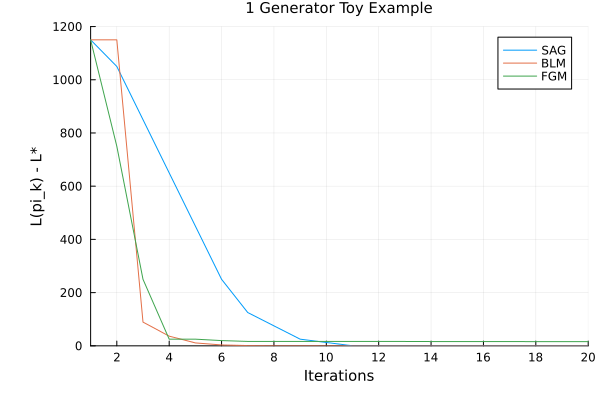

In [107]:
plot(
    title = "1 Generator Toy Example",
    xlabel = "Iterations",
    ylabel = "L(pi_k) - L*",
    xlims=(1,20),
    ylims=(0,1200),
    xticks=0:2:20,
    xscale=:identity,
    titlefontsize=10,
    labelfontsize=10,
    size=(600,400),
    bottom_margin = 15px,
    left_margin = 30px
)
plot!(mon(350 .- SAG), label = "SAG")
plot!(mon(350 .- BLM), label = "BLM")
plot!(mon(350 .- FGM), label = "FGM")